
#분석 목표 : 인스타그램에서 얻은 데이터를 가지고 년도별, 달별로 사람들의 테그동향을 파악하여, 워드클라우드로 시각화하기 
#추가적인 코드 작성 할 부분 : text에서 u200d 단어의 빈도수가 많아서 리스트에서 불용어로 삭제되지 못하는 부분이 생김. 이부분을 해결할 코드 짜기 

In [2]:
import pandas as pd

df_data= pd.read_csv("E:\Ella\마케팅 분석 및 시각화\인스타그램으로 데이터 분석/Insta_result_700_0117.csv",encoding='utf-8')
df_data

,Unnamed: 0,content,tags,data,place
0,0,.나 혼자 먹는다나 혼자 마신다지자매는 오므라이스 만들어 주고나는 느타리버섯 튀겨서...,"['#남편은당직', '#택배언박싱', '#느타리버섯튀김', '#맛나다', '#맥주한...",2021-01-16,NaN
1,1,#첫줄안녕..Nice to meet you??..#소확행#사이좋게지내렴,"['#첫줄안녕..Nice', '#소확행', '#사이좋게지내렴']",2021-01-14,NaN
2,2,코로나가 바꾼 방학_계속해서 세 아이는 그림 삼매경_#새해일상 #방학일상 #아크릴화...,"['#새해일상', '#방학일상', '#아크릴화', '#코로나일상', '#엄마는미술치...",2021-01-04,NaN
3,3,갑자기 내린눈에공원으로 달려나감..가게에 함께 출퇴근하는어린이..#수제초콜릿 #홍대...,"['#수제초콜릿', '#홍대', '#연남동', '#연남동초콜릿', '#홍대초콜릿',...",2021-01-12,NaN
4,4,.갓지은 하얀밥에 바글바글 김치찌개...#여보우리다여트는낼부터하까요#김치찌개만끓이면...,"['#여보우리다여트는낼부터하까요', '#김치찌개만끓이면과식하는부부', '#밥도둑',...",2021-01-14,NaN
...,...,...,...,...,...
695,695,"..양파, 양배추, 소고기만 듬뿍 넣고 춘장에 볶아 중국집 스? 짜장으로~은이에게 ...","['#코로나일상', '#집콕일상', '#집밥', '#점심메뉴', '#엄마표짜장면',...",2021-01-15,NaN
696,696,"..영화보기 좋은날.일본영화 <신문기자- 심은경,마츠자카 토리 주연>.#금요일 #집...","['#금요일', '#집콕', '#방콕', '#혼자영화', '#자발적', '#혼영',...",2021-01-15,"Busan, South Korea"
697,697,"??우리행복이??????아파트단지앞에 나온것만으로도 좋아함??에휴- 망할코로나, ?...","['#엔젤쩡베이비', '#모녀샷???']",2021-01-15,NaN
698,698,오늘은 ??검사가 길어져서 핸드폰으로 계속 업무 보다가 바람 쐬고 있어요 베스트만 ...,"['#걸스하우스', '#곱창떡볶이', '#떡볶이밀키트', '#신사역8번집', '#가...",2021-01-15,파미에스테이션


In [3]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  700 non-null    int64 
 1   content     700 non-null    object
 2   tags        700 non-null    object
 3   data        700 non-null    object
 4   place       161 non-null    object
dtypes: int64(1), object(4)
memory usage: 27.5+ KB


In [4]:
#필요없는 행 삭제하기 
df = df_data.drop(['Unnamed: 0'], axis=1)
df

,content,tags,data,place
0,.나 혼자 먹는다나 혼자 마신다지자매는 오므라이스 만들어 주고나는 느타리버섯 튀겨서...,"['#남편은당직', '#택배언박싱', '#느타리버섯튀김', '#맛나다', '#맥주한...",2021-01-16,NaN
1,#첫줄안녕..Nice to meet you??..#소확행#사이좋게지내렴,"['#첫줄안녕..Nice', '#소확행', '#사이좋게지내렴']",2021-01-14,NaN
2,코로나가 바꾼 방학_계속해서 세 아이는 그림 삼매경_#새해일상 #방학일상 #아크릴화...,"['#새해일상', '#방학일상', '#아크릴화', '#코로나일상', '#엄마는미술치...",2021-01-04,NaN
3,갑자기 내린눈에공원으로 달려나감..가게에 함께 출퇴근하는어린이..#수제초콜릿 #홍대...,"['#수제초콜릿', '#홍대', '#연남동', '#연남동초콜릿', '#홍대초콜릿',...",2021-01-12,NaN
4,.갓지은 하얀밥에 바글바글 김치찌개...#여보우리다여트는낼부터하까요#김치찌개만끓이면...,"['#여보우리다여트는낼부터하까요', '#김치찌개만끓이면과식하는부부', '#밥도둑',...",2021-01-14,NaN
...,...,...,...,...
695,"..양파, 양배추, 소고기만 듬뿍 넣고 춘장에 볶아 중국집 스? 짜장으로~은이에게 ...","['#코로나일상', '#집콕일상', '#집밥', '#점심메뉴', '#엄마표짜장면',...",2021-01-15,NaN
696,"..영화보기 좋은날.일본영화 <신문기자- 심은경,마츠자카 토리 주연>.#금요일 #집...","['#금요일', '#집콕', '#방콕', '#혼자영화', '#자발적', '#혼영',...",2021-01-15,"Busan, South Korea"
697,"??우리행복이??????아파트단지앞에 나온것만으로도 좋아함??에휴- 망할코로나, ?...","['#엔젤쩡베이비', '#모녀샷???']",2021-01-15,NaN
698,오늘은 ??검사가 길어져서 핸드폰으로 계속 업무 보다가 바람 쐬고 있어요 베스트만 ...,"['#걸스하우스', '#곱창떡볶이', '#떡볶이밀키트', '#신사역8번집', '#가...",2021-01-15,파미에스테이션


In [5]:
#date 날짜 datetime 으로 변경해주기

import time
df['data'] = pd.to_datetime(df['data'])
df['year'] = df['data'].dt.year
df['month'] = df['data'].dt.month
df['day'] = df['data'].dt.day
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   content  700 non-null    object        
 1   tags     700 non-null    object        
 2   data     700 non-null    datetime64[ns]
 3   place    161 non-null    object        
 4   year     700 non-null    int64         
 5   month    700 non-null    int64         
 6   day      700 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 38.4+ KB


,content,tags,data,place,year,month,day
0,.나 혼자 먹는다나 혼자 마신다지자매는 오므라이스 만들어 주고나는 느타리버섯 튀겨서...,"['#남편은당직', '#택배언박싱', '#느타리버섯튀김', '#맛나다', '#맥주한...",2021-01-16,NaN,2021,1,16
1,#첫줄안녕..Nice to meet you??..#소확행#사이좋게지내렴,"['#첫줄안녕..Nice', '#소확행', '#사이좋게지내렴']",2021-01-14,NaN,2021,1,14
2,코로나가 바꾼 방학_계속해서 세 아이는 그림 삼매경_#새해일상 #방학일상 #아크릴화...,"['#새해일상', '#방학일상', '#아크릴화', '#코로나일상', '#엄마는미술치...",2021-01-04,NaN,2021,1,4
3,갑자기 내린눈에공원으로 달려나감..가게에 함께 출퇴근하는어린이..#수제초콜릿 #홍대...,"['#수제초콜릿', '#홍대', '#연남동', '#연남동초콜릿', '#홍대초콜릿',...",2021-01-12,NaN,2021,1,12
4,.갓지은 하얀밥에 바글바글 김치찌개...#여보우리다여트는낼부터하까요#김치찌개만끓이면...,"['#여보우리다여트는낼부터하까요', '#김치찌개만끓이면과식하는부부', '#밥도둑',...",2021-01-14,NaN,2021,1,14
...,...,...,...,...,...,...,...
695,"..양파, 양배추, 소고기만 듬뿍 넣고 춘장에 볶아 중국집 스? 짜장으로~은이에게 ...","['#코로나일상', '#집콕일상', '#집밥', '#점심메뉴', '#엄마표짜장면',...",2021-01-15,NaN,2021,1,15
696,"..영화보기 좋은날.일본영화 <신문기자- 심은경,마츠자카 토리 주연>.#금요일 #집...","['#금요일', '#집콕', '#방콕', '#혼자영화', '#자발적', '#혼영',...",2021-01-15,"Busan, South Korea",2021,1,15
697,"??우리행복이??????아파트단지앞에 나온것만으로도 좋아함??에휴- 망할코로나, ?...","['#엔젤쩡베이비', '#모녀샷???']",2021-01-15,NaN,2021,1,15
698,오늘은 ??검사가 길어져서 핸드폰으로 계속 업무 보다가 바람 쐬고 있어요 베스트만 ...,"['#걸스하우스', '#곱창떡볶이', '#떡볶이밀키트', '#신사역8번집', '#가...",2021-01-15,파미에스테이션,2021,1,15


In [6]:
#2020년과 2021년의 개시글갯수 살펴보기
df_counts = df.groupby('year').count()
df_counts

#2021년 개시글이 약 5배정도 많음을 확인할수 있다.

#2021년의 매달 분포 확인하기
df_month_count= df.groupby(['year','month']).count()
df_month_count 

#대부분 2021년 1월 데이터를 가져옴 


content  tags  data  place  day
year month                                 
2020 5            1     1     1      1    1
     12           1     1     1      0    1
2021 1          698   698   698    160  698

In [7]:
#2020년 12월 게시된 해시태그를 확인해보기 

df_2020 = df[df['year']==2020].head()
df_2020.head()

,content,tags,data,place,year,month,day
330,#코로나일상 #코로나조심 #일상공유,"['#코로나일상', '#코로나조심', '#일상공유']",2020-05-03,中國廣州 China Guangzhou,2020,5,3
654,900일인지도 모르고 지나간 900일^^; 다행히 그날 길다다가 예쁜 샵 앞에서 찍...,"['#29개월아기', '#육아일상', '#코로나일상', '#오늘은903일', '#코...",2020-12-14,NaN,2020,12,14


In [18]:
#2021년 1월 게시된 해시태그를 확인해보기 

df_2021 = df[df['year']==2021]
df_2021.info()
print(df_2021.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 698 entries, 0 to 699
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   content  698 non-null    object        
 1   tags     698 non-null    object        
 2   data     698 non-null    datetime64[ns]
 3   place    160 non-null    object        
 4   year     698 non-null    int64         
 5   month    698 non-null    int64         
 6   day      698 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 43.6+ KB
                                             content  \
0  .나 혼자 먹는다나 혼자 마신다지자매는 오므라이스 만들어 주고나는 느타리버섯 튀겨서...   
1            #첫줄안녕..Nice to meet you??..#소확행#사이좋게지내렴   
2  코로나가 바꾼 방학_계속해서 세 아이는 그림 삼매경_#새해일상 #방학일상 #아크릴화...   
3  갑자기 내린눈에공원으로 달려나감..가게에 함께 출퇴근하는어린이..#수제초콜릿 #홍대...   
4  .갓지은 하얀밥에 바글바글 김치찌개...#여보우리다여트는낼부터하까요#김치찌개만끓이면...   

                                                tags       data place  year  \
0  ['

In [21]:
tags_total = []

#리스트로 바꾸고, 특수문자 제거해주기 

for tags in df_2021['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        list = tag.replace("#",'')
        tags_total.append(list)
        
tag_counts_selected = Counter(tags_total)       
tag_counts_selected

Counter({'남편은당직': 1,
         '택배언박싱': 1,
         '느타리버섯튀김': 1,
         '맛나다': 1,
         '맥주한잔': 1,
         '언제나지자매': 1,
         '자매스타그램': 5,
         '자매일상': 1,
         '일상공유': 1,
         '일상스타그램': 23,
         '주부스타그램': 7,
         '집밥': 37,
         '홈쿡': 23,
         '코로나일상': 499,
         '첫줄안녕..Nice': 1,
         '소확행': 7,
         '사이좋게지내렴': 2,
         '새해일상': 1,
         '방학일상': 3,
         '아크릴화': 1,
         '엄마는미술치료사': 1,
         '맘아트': 1,
         '홈스쿨': 1,
         '홈아트': 1,
         '수제초콜릿': 1,
         '홍대': 1,
         '연남동': 1,
         '연남동초콜릿': 1,
         '홍대초콜릿': 1,
         '가게일상': 1,
         '여보우리다여트는낼부터하까요': 1,
         '김치찌개만끓이면과식하는부부': 1,
         '밥도둑': 2,
         '저녁메뉴': 10,
         '김치찌개': 2,
         '주부일상': 6,
         '집밖은위험해??': 1,
         '': 80,
         '오늘눈사진아님주의': 1,
         'covidlife': 5,
         'markham': 3,
         'toronto': 3,
         'canada': 3,
         '산책': 8,
         '마캄': 3,
         '토론토': 3,
         '캐나다': 3,
   

In [22]:
tag_counts_selected.most_common(50)

[('코로나일상', 499),
 ('일상', 96),
 ('', 80),
 ('주말', 51),
 ('소통', 38),
 ('집밥', 37),
 ('집콕', 34),
 ('주말일상', 33),
 ('먹스타그램', 33),
 ('육아', 29),
 ('데일리', 27),
 ('좋아요', 27),
 ('맞팔', 24),
 ('맛스타그램', 24),
 ('일상스타그램', 23),
 ('홈쿡', 23),
 ('육아맘', 20),
 ('집콕놀이', 20),
 ('집스타그램', 18),
 ('daily', 17),
 ('아들스타그램', 16),
 ('육아스타그램', 15),
 ('??', 15),
 ('쿡스타그램', 15),
 ('좋아요반사', 15),
 ('아들맘', 14),
 ('코로나', 14),
 ('육아소통', 14),
 ('먹방', 14),
 ('딸스타그램', 13),
 ('데일리그램', 13),
 ('육아일상', 13),
 ('좋반', 13),
 ('맘스타그램', 12),
 ('토요일', 12),
 ('불금', 12),
 ('홈카페', 11),
 ('일상소통', 11),
 ('집콕일상', 11),
 ('저녁메뉴', 10),
 ('인친', 10),
 ('저녁', 10),
 ('일상기록', 10),
 ('요리', 10),
 ('금요일', 10),
 ('딸바보', 9),
 ('슬기로운집콕생활', 9),
 ('주말스타그램', 9),
 ('온더테이블', 9),
 ('코로나집콕', 9)]

In [31]:
#불용어 빼기 

STOPWORDS = ['남편은당직', '맛나다', '', '여보우리다여트는낼부터하까요', '일상', '#제주자연눈썹', '좋아요','셀피','2021년', '인친','신축년', '럽스타그램'
'연말', 'happynewyear', '소통', '맞팔', '',  '새해첫날', '#2021', '연말', '새해' 'goodbye2020', '새해','goodbye2020','2020','일요일','사랑해','필리핀','세부',
            '해피뉴이어','코로나','주말','12월31일','세부시티','코로나일상']

tag_total_selected = []
for tag in tag_counts_selected:
    if tag not in STOPWORDS:
        tag_total_selected.append(tag)
        
tag_total_selected_count = Counter(tag_total_selected)
tag_total_selected_count.most_common(50)

[('택배언박싱', 1),
 ('느타리버섯튀김', 1),
 ('맥주한잔', 1),
 ('언제나지자매', 1),
 ('자매스타그램', 1),
 ('자매일상', 1),
 ('일상공유', 1),
 ('일상스타그램', 1),
 ('주부스타그램', 1),
 ('집밥', 1),
 ('홈쿡', 1),
 ('첫줄안녕..Nice', 1),
 ('소확행', 1),
 ('사이좋게지내렴', 1),
 ('새해일상', 1),
 ('방학일상', 1),
 ('아크릴화', 1),
 ('엄마는미술치료사', 1),
 ('맘아트', 1),
 ('홈스쿨', 1),
 ('홈아트', 1),
 ('수제초콜릿', 1),
 ('홍대', 1),
 ('연남동', 1),
 ('연남동초콜릿', 1),
 ('홍대초콜릿', 1),
 ('가게일상', 1),
 ('김치찌개만끓이면과식하는부부', 1),
 ('밥도둑', 1),
 ('김치찌개', 1),
 ('주부일상', 1),
 ('집밖은위험해??', 1),
 ('오늘눈사진아님주의', 1),
 ('covidlife', 1),
 ('markham', 1),
 ('toronto', 1),
 ('canada', 1),
 ('산책', 1),
 ('마캄', 1),
 ('토론토', 1),
 ('캐나다', 1),
 ('캐나다일상', 1),
 ('맘스타그램', 1),
 ('딸스타그램', 1),
 ('육아맘일상', 1),
 ('육아소통환영', 1),
 ('딸맘', 1),
 ('딸바보', 1),
 ('닭띠아기', 1),
 ('슬기로운집콕생활', 1)]

In [32]:
#추출한 명사 리스트를 활용해 명사만으로 이뤄진 문서 생성
noun_doc = ' '.join(tag_total_selected)
noun_doc = noun_doc.strip()

noun_doc


"택배언박싱 느타리버섯튀김 맥주한잔 언제나지자매 자매스타그램 자매일상 일상공유 일상스타그램 주부스타그램 집밥 홈쿡 첫줄안녕..Nice 소확행 사이좋게지내렴 새해일상 방학일상 아크릴화 엄마는미술치료사 맘아트 홈스쿨 홈아트 수제초콜릿 홍대 연남동 연남동초콜릿 홍대초콜릿 가게일상 김치찌개만끓이면과식하는부부 밥도둑 김치찌개 주부일상 집밖은위험해?? 오늘눈사진아님주의 covidlife markham toronto canada 산책 마캄 토론토 캐나다 캐나다일상 맘스타그램 딸스타그램 육아맘일상 육아소통환영 딸맘 딸바보 닭띠아기 슬기로운집콕생활 집콕요리 늙은호박 호박죽 식비생각하면 집요리 sunny niceday walkinthepark 몇일걸러 한시간 나와줘야 아들맘 예비초등 홈스쿨링 food 군고구마 호박고구마?? jmt 마켓컬리 쿠진아트 에어프라이어오븐 2.5단계연장 집콕생활 자유롭게살자 매일 식판 선물 집콕 일요일오후 소소하게 주말오후 데일리 홈카페 홈카페놀이 브런치 브런치타임 브런치메뉴 홈메이드 프렌치토스트 프랜치토스트 토스트 식빵요리 간편식 간식 나인웨어 올디너리테이블세트 빈티지핑크 마스크일상 코로나일상마스크이제 코로나조심하세요 코로나집밥 코로나19로식비가어마어마 새조개샤브샤브?? 양이적어요 새조개2키로 걍맛만봐라????\\u200d♀? 대방어맛나네 주객전도된느낌?? 점점뷔페가되간다 외식하고싶다 주말일상 일요일점심 바지락칼국수 외식이언제였던가 머먹지 먹고사는게일 코로나스트레스 소소한일상 민민네오후...스을쩍 나른한오후 민민형제네 꽃 태양 사랑 이루다 데일리그램 선팔 공유 친구 환영 스머프 다이어트 다이어트중 인스타그램 셀스타그램 일상다이소 블럭젤리엄마 배자매 격하게나가고싶다 베어브릭 스와로브스키 키덜트 키덜트그램 애스타글램 육아스타그램 아기 베이비 베이비스타그램 베이비그램 베이비인스타 인스타베이비 아기스타그램 예쁜아기 아기데일리 오케이베이비 럽스타그램 육아소통 육아일기 울애기 instababy baby okbaby babygram babylove babylife

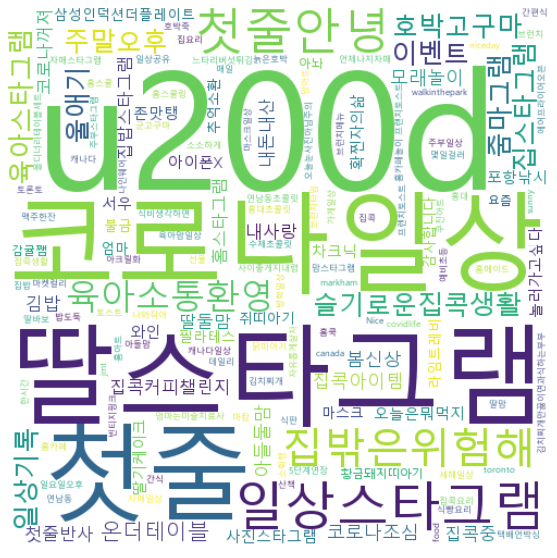

In [33]:
# 워드클라우드 파라미터 설정
#폰트 설정 주의! 
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

font_path="G:/workpy/zoom/malgun.ttf"  #폰트
background_color="white"      #배경색
margin=3                     #모서리 여백 넓이
min_font_size=7              #최소 글자 크기
max_font_size=150             #최대 글자 크기
width=500                     #이미지 가로 크기
height=500                    #이미지 세로 크기
wc = WordCloud(font_path=font_path, background_color=background_color, margin=margin, \
               min_font_size=min_font_size, max_font_size=max_font_size, width=width, height=height)
wc.generate(noun_doc)

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()